### cv2.BorderTypes

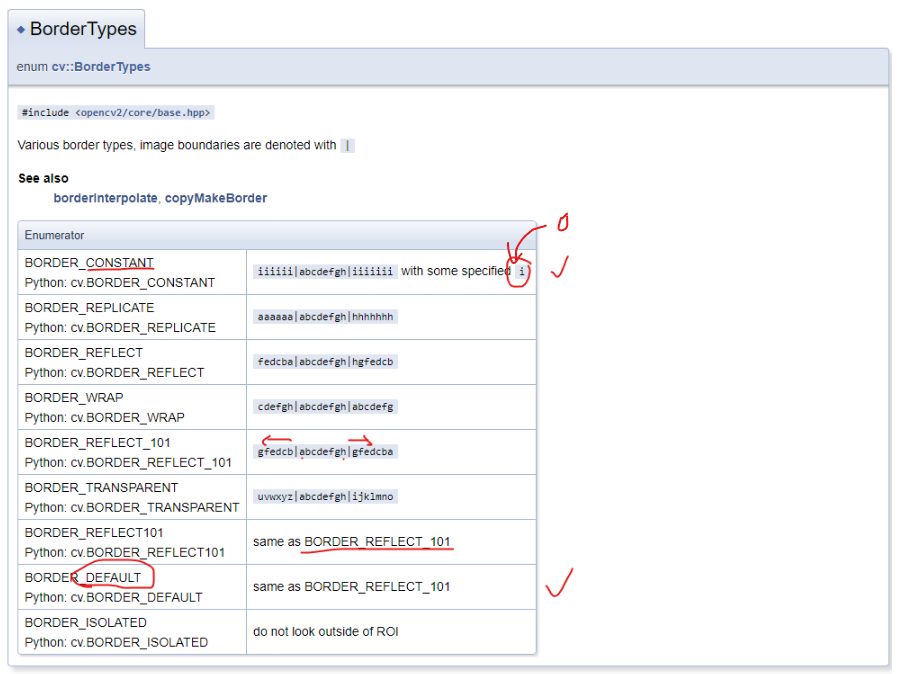

In [2]:
"""
  区分相关运算 and 卷积运算

  cv2.filter2D 相关性运算（不是卷积）:
    anchor-anchor of the kernel that indicates the relative position of a filtered point within the kernel;
    the anchor should lie within the kernel;
    default value (-1,-1) means that the anchor is at the kernel center.
  具体参数解析参考：https://blog.csdn.net/hysterisis/article/details/113097507
"""

import numpy as np
import cv2

A1 = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]], dtype='uint8')

kernel1 = np.array([[1, 1, 1],
                    [0, 0, 0],
                    [1, 1, 1]], dtype='uint8')

B1 = cv2.filter2D(A1, cv2.CV_8U, kernel1, anchor=(0, 0), borderType=cv2.BORDER_CONSTANT)
B2 = cv2.filter2D(A1, cv2.CV_8U, kernel1, anchor=(-1, -1), borderType=cv2.BORDER_CONSTANT)
B3 = cv2.filter2D(A1, -1, kernel1, anchor=(1, 1), borderType=cv2.BORDER_CONSTANT) # the same as anchor=(-1,-1)
B4 = cv2.filter2D(A1, cv2.CV_8U, kernel1, anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)
print(B1)
print(B2)
print(B3)
print(B4)

[[36 42 30 16]
 [60 66 46 24]
 [30 33 23 12]
 [42 45 31 16]]
[[11 18 21 15]
 [22 36 42 30]
 [38 60 66 46]
 [19 30 33 23]]
[[11 18 21 15]
 [22 36 42 30]
 [38 60 66 46]
 [19 30 33 23]]
[[34 36 42 44]
 [34 36 42 44]
 [58 60 66 68]
 [58 60 66 68]]


In [3]:
"""
  区分相关运算 and 卷积运算

  scipy.signal.convolve2d 卷积运算:
  scipy.signal.convolve2d(in1, in2, mode='full', boundary='fill', fillvalue=0)

  具体参数解析：https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

"""

import numpy as np
from scipy import signal

A1 = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12],
              [13, 14, 15, 16]], dtype='uint8')

kernel = np.array([[1, 1, 1],
                    [0, 0, 1],
                    [1, 1, 0]], dtype='uint8')
print(f"matrix :\n{A1}")
print(f"kernel after rot180:\n{np.rot90(kernel, 2)}")

B1 = signal.convolve2d(A1, kernel, mode="same", boundary='fill', fillvalue=0)
B2 = signal.convolve2d(A1, kernel, mode="full", boundary='fill', fillvalue=0)
B3 = signal.convolve2d(A1, kernel, mode="valid", boundary='fill', fillvalue=0)
B4 = signal.convolve2d(A1, kernel, mode="full", boundary='fill', fillvalue=0)
print(B1)
print(B2)
print(B3)
# print(B4)

matrix :
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
kernel after rot180:
[[0 1 1]
 [1 0 0]
 [1 1 1]]
[[11 19 23 18]
 [22 40 46 34]
 [38 64 70 50]
 [19 34 37 27]]
[[ 1  3  6  9  7  4]
 [ 5 11 19 23 18 12]
 [10 22 40 46 34 20]
 [18 38 64 70 50 28]
 [ 9 19 34 37 27 16]
 [13 27 29 31 16  0]]
[[40 46]
 [64 70]]
